#### 로지스틱 회귀 
- 선형 모델 기반으로 분류를 해주는 모델
- 종속변수 즉, 타겟이 범주형인 경우에 적용
- 결과를 확률로 변환하여 처리
- 종류
    * 2진분류 : 타겟의 클레스가 2개
    * 다중분류 : 타겟의 클레스가 3개 이상

In [2]:
# 모듈로딩
import pandas as pd
# 판다스에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format='{:.5f}'.format
# 데이터준비 
DATA_FILE='../data/fish.csv'

fishDF=pd.read_csv(DATA_FILE)
fishDF.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.00000,25.40000,30.00000,11.52000,4.02000
1,Bream,290.00000,26.30000,31.20000,12.48000,4.30560
2,Bream,340.00000,26.50000,31.10000,12.37780,4.69610
3,Bream,363.00000,29.00000,33.50000,12.73000,4.45550
4,Bream,430.00000,29.00000,34.00000,12.44400,5.13400


In [4]:
# 타겟/종속변수의 클레스 수 => 7개
pd.unique(fishDF['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
# 피쳐 데이터셋 추출
featureDF = fishDF[fishDF.columns[1:]].to_numpy()
print(featureDF[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
# 타겟 추출
targetSR=fishDF['Species'].to_numpy()
print(targetSR[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


- 학습용 데이터셋 준비 : trainDS,testDS

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(featureDF,targetSR)

In [10]:
from sklearn.preprocessing import StandardScaler
# 학습용(trainDS)기반 스케일러 생성
ss=StandardScaler()
ss.fit(X_train)

# 스케일링 진행
train_scaled=ss.transform(X_train)
test_scaled=ss.transform(X_test)

- 학습진행
    * 학습방법 : 지도학습 > 분류
    * 알고리즘 : 로지스틱스 회귀
        * 종속면수 즉, 피쳐에 가중치 곱셈 후 합계 한 결과 >>> 확률값으로 변환

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#과학적/지수 표기법 대신 소수점 6자리까지 출력
np.set_printoptions(precision=6,suppress=True)

z= np.arange(-5,5,0.1)
phi=1/(1+np.exp(-z))

print(f'z =>{z}\n phi = {phi}')

z =>[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 -0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9]
 phi = [0.006693 0.007392 0.008163 0.009013 0.009952 0.010987 0.012128 0.013387
 0.014774 0.016302 0.017986 0.01984  0.021881 0.024127 0.026597 0.029312
 0.032295 0.035571 0.039166 0.043107 0.047426 0.052154 0.057324 0.062973
 0.069138 0.075858 0.083173 0.091123 0.09975  0.109097 0.119203 0.130108
 0.141851 0.154465 0.167982 0.182426 0.197816 0.214165 0.231475 0.24974
 0.268941 0.28905  0.310026 0.331812 0.354344 0.377541 0.401312 0.425557
 0.450166 0.475021 0.5      0.524979 0.5498

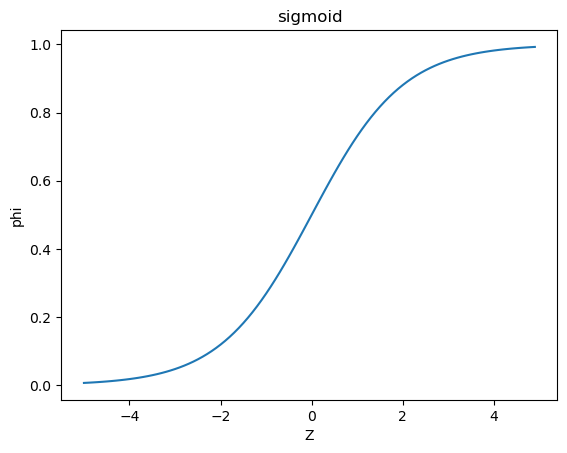

In [12]:
plt.plot(z,phi)
plt.xlabel('Z')
plt.ylabel('phi')
plt.title('sigmoid')
plt.show()

### 로지스틱스 회귀로 이진 분류 수행하기

In [13]:
char_arr =np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [18]:
### 2진분류 ==> 2개 품종의 데이터셋 추출
mask=(y_train=='Bream')|(y_train=='Smelt')
train_bream_smelt=train_scaled[mask]
target_bream_smelt=y_train[mask]

mask=(y_test=='Bream')|(y_test=='Smelt')
test_bream_smelt=test_scaled[mask]
test_target_bream_smelt=y_test[mask]

In [19]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

- 태스팅진행 => predict(피쳐2D)
    * predict() : 예측 클레스 반환
    * predict_proba(): 각 클레스별 확률값
    * decision_function : 